In [1]:
# Import the packages

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#Read the file
df = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\Data\archive\all_games.csv')


In [2]:
df.head(10)

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,23-Nov-98,"As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,20-Sep-00,As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,29-Apr-08,[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,8-Sep-99,"This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,29-Apr-08,[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9
5,Super Mario Galaxy,Wii,12-Nov-07,[Metacritic's 2007 Wii Game of the Year] The u...,97,9.1
6,Super Mario Galaxy 2,Wii,23-May-10,"Super Mario Galaxy 2, the sequel to the galaxy...",97,9.1
7,Red Dead Redemption 2,Xbox One,26-Oct-18,Developed by the creators of Grand Theft Auto ...,97,8
8,Grand Theft Auto V,Xbox One,18-Nov-14,Grand Theft Auto 5 melds storytelling and game...,97,7.9
9,Grand Theft Auto V,PlayStation 3,17-Sep-13,"Los Santos is a vast, sun-soaked metropolis fu...",97,8.3


In [3]:
# Mising data
for col in df.columns:
    pct_misisng = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_misisng*100)))

name - 0%
platform - 0%
release_date - 0%
summary - 1%
meta_score - 0%
user_review - 0%


In [4]:
# Data types
df.dtypes

name            object
platform        object
release_date    object
summary         object
meta_score       int64
user_review     object
dtype: object

In [5]:
df['user_score'] = df['user_review'].replace('tbd',np.nan)

In [6]:
df['user_score'] = df['user_score'].astype('float64')

In [7]:
df['user_score'] = df['user_score'] * 10
df.head(10)

,name,platform,release_date,summary,meta_score,user_review,user_score
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,23-Nov-98,"As a young boy, Link is tricked by Ganondorf, ...",99,9.1,91.0
1,Tony Hawk's Pro Skater 2,PlayStation,20-Sep-00,As most major publishers' development efforts ...,98,7.4,74.0
2,Grand Theft Auto IV,PlayStation 3,29-Apr-08,[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,77.0
3,SoulCalibur,Dreamcast,8-Sep-99,"This is a tale of souls and swords, transcendi...",98,8.4,84.0
4,Grand Theft Auto IV,Xbox 360,29-Apr-08,[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,79.0
5,Super Mario Galaxy,Wii,12-Nov-07,[Metacritic's 2007 Wii Game of the Year] The u...,97,9.1,91.0
6,Super Mario Galaxy 2,Wii,23-May-10,"Super Mario Galaxy 2, the sequel to the galaxy...",97,9.1,91.0
7,Red Dead Redemption 2,Xbox One,26-Oct-18,Developed by the creators of Grand Theft Auto ...,97,8,80.0
8,Grand Theft Auto V,Xbox One,18-Nov-14,Grand Theft Auto 5 melds storytelling and game...,97,7.9,79.0
9,Grand Theft Auto V,PlayStation 3,17-Sep-13,"Los Santos is a vast, sun-soaked metropolis fu...",97,8.3,83.0


In [8]:
df['user_score'] - df['meta_score']

0        -8.0
1       -24.0
2       -21.0
3       -14.0
4       -19.0
         ... 
18795    -9.0
18796    -5.0
18797     8.0
18798    -3.0
18799     0.0
Length: 18800, dtype: float64

In [9]:
df.sort_values(by=['meta_score'], inplace = False, ascending = False)

,name,platform,release_date,summary,meta_score,user_review,user_score
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,23-Nov-98,"As a young boy, Link is tricked by Ganondorf, ...",99,9.1,91.0
2,Grand Theft Auto IV,PlayStation 3,29-Apr-08,[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,77.0
3,SoulCalibur,Dreamcast,8-Sep-99,"This is a tale of souls and swords, transcendi...",98,8.4,84.0
4,Grand Theft Auto IV,Xbox 360,29-Apr-08,[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,79.0
1,Tony Hawk's Pro Skater 2,PlayStation,20-Sep-00,As most major publishers' development efforts ...,98,7.4,74.0
...,...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,21-May-13,Fast & Furious: Showdown takes some of the fra...,22,1.3,13.0
18796,Drake of the 99 Dragons,Xbox,3-Nov-03,Drake is out for revenge in a supernatural Hon...,22,1.7,17.0
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,22-Sep-15,"Head out on a journey of redemption, driven by...",21,2.9,29.0
18798,Infestation: Survivor Stories (The War Z),PC,15-Oct-12,"(Formerly known as ""The War Z"") It has been 5 ...",20,1.7,17.0


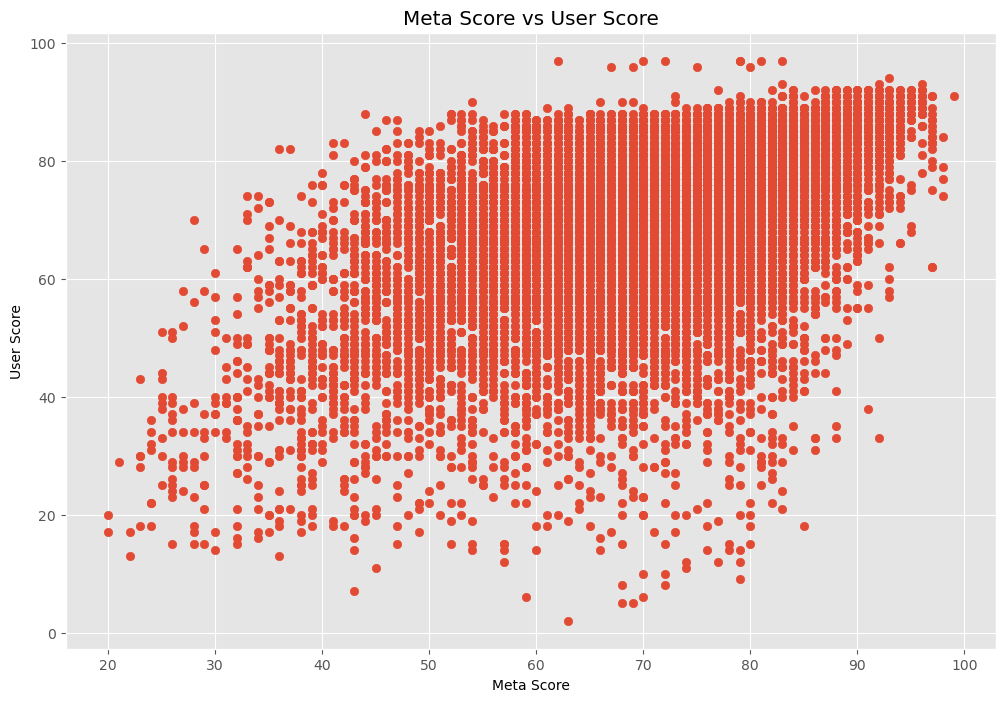

In [11]:
# Scatter plot with meta score and user score

plt.scatter(x=df['meta_score'],y=df['user_score'])

plt.title('Meta Score vs User Score')

plt.xlabel('Meta Score')

plt.ylabel('User Score')

plt.show()

<Axes: xlabel='meta_score', ylabel='user_score'>

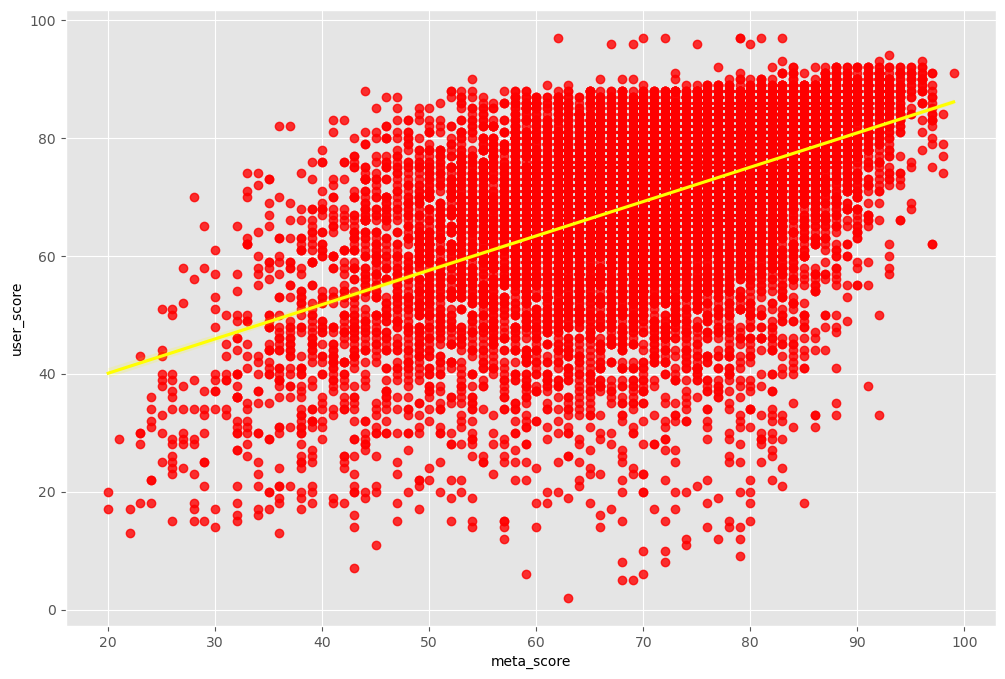

In [16]:
# Using seaborn

sns.regplot(x='meta_score',y='user_score',data=df, scatter_kws={"color":"red"}, line_kws={"color":"yellow"})

In [27]:
df_numerized = df.copy()  

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,platform,release_date,summary,meta_score,user_review,user_score
0,10453,5,2355,1482,99,87,91.0
1,11008,8,1920,1504,98,70,74.0
2,4230,10,3117,14122,98,73,77.0
3,9210,2,4376,12492,98,80,84.0
4,4230,19,3117,14125,98,75,79.0
...,...,...,...,...,...,...,...
18795,3537,19,2034,4279,22,9,13.0
18796,2876,18,3367,3510,22,13,17.0
18797,250,11,2233,5380,21,25,29.0
18798,4861,6,1034,251,20,13,17.0


In [29]:
df.corr(method='pearson')

C:\Users\Admin\AppData\Local\Temp\ipykernel_27116\1928163937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,meta_score,user_score
meta_score,1.00000,0.52626
user_score,0.52626,1.00000


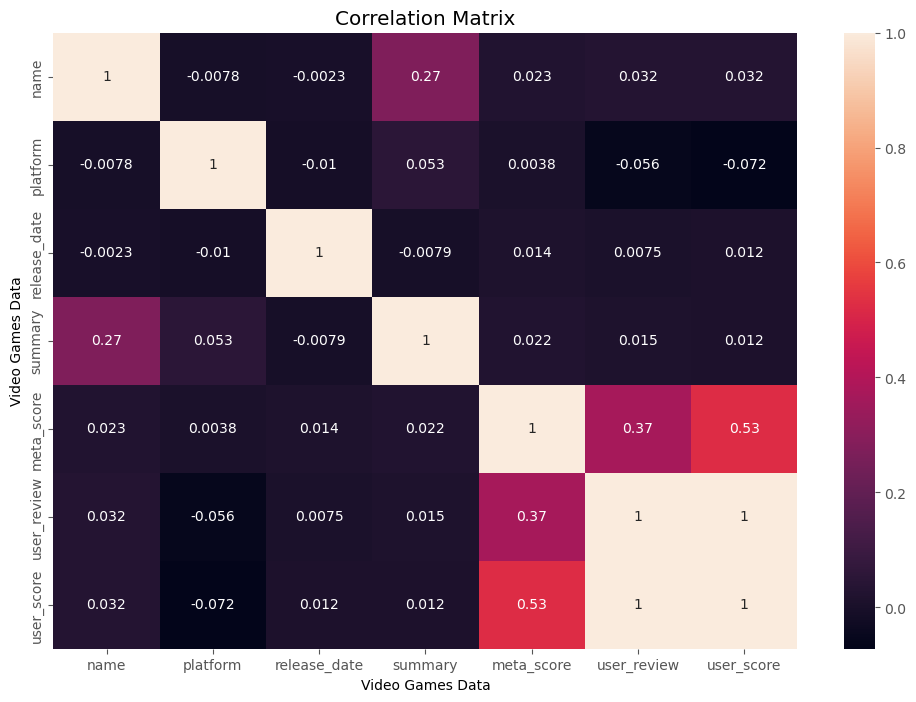

In [30]:
correlation_matrix=df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot= True)

plt.title('Correlation Matrix')

plt.xlabel('Video Games Data')

plt.ylabel('Video Games Data')

plt.show()

In [31]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name          name            1.000000
              platform       -0.007839
              release_date   -0.002301
              summary         0.272550
              meta_score      0.022728
              user_review     0.031811
              user_score      0.032179
platform      name           -0.007839
              platform        1.000000
              release_date   -0.010274
              summary         0.053415
              meta_score      0.003757
              user_review    -0.055613
              user_score     -0.071765
release_date  name           -0.002301
              platform       -0.010274
              release_date    1.000000
              summary        -0.007905
              meta_score      0.013851
              user_review     0.007465
              user_score      0.011512
summary       name            0.272550
              platform        0.053415
              release_date   -0.007905
              summary         1.000000
              meta_score 

In [32]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

platform      user_score     -0.071765
user_score    platform       -0.071765
platform      user_review    -0.055613
user_review   platform       -0.055613
release_date  platform       -0.010274
platform      release_date   -0.010274
release_date  summary        -0.007905
summary       release_date   -0.007905
platform      name           -0.007839
name          platform       -0.007839
              release_date   -0.002301
release_date  name           -0.002301
meta_score    platform        0.003757
platform      meta_score      0.003757
release_date  user_review     0.007465
user_review   release_date    0.007465
user_score    release_date    0.011512
release_date  user_score      0.011512
user_score    summary         0.011807
summary       user_score      0.011807
meta_score    release_date    0.013851
release_date  meta_score      0.013851
summary       user_review     0.015227
user_review   summary         0.015227
meta_score    summary         0.021915
summary       meta_score 

In [35]:
high_corr = sorted_pairs[(sorted_pairs > 0.5)]

high_corr

user_score    meta_score      0.526260
meta_score    user_score      0.526260
user_score    user_review     0.999998
user_review   user_score      0.999998
name          name            1.000000
summary       summary         1.000000
meta_score    meta_score      1.000000
release_date  release_date    1.000000
platform      platform        1.000000
user_review   user_review     1.000000
user_score    user_score      1.000000
dtype: float64

In [ ]:
high correlation between user score and meta score

In [ ]:
# Because there are different scores with different platform, it would be the last and extra codes

In [36]:
#Calcute the average of meta score and user score by name
df['meta_score']=df.groupby('name')['meta_score'].transform('mean')
df['user_score']=df.groupby('name')['user_score'].transform('mean')
df.drop_duplicates(subset='name',inplace=False)
df['meta_score']=np.round(df['meta_score'], decimals=2)
df['user_score']=np.round(df['user_score'], decimals=2)
df

,name,platform,release_date,summary,meta_score,user_review,user_score
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,23-Nov-98,"As a young boy, Link is tricked by Ganondorf, ...",99.00,9.1,91.00
1,Tony Hawk's Pro Skater 2,PlayStation,20-Sep-00,As most major publishers' development efforts ...,93.00,7.4,75.60
2,Grand Theft Auto IV,PlayStation 3,29-Apr-08,[Metacritic's 2008 PS3 Game of the Year; Also ...,95.33,7.7,75.33
3,SoulCalibur,Dreamcast,8-Sep-99,"This is a tale of souls and swords, transcendi...",88.50,8.4,83.00
4,Grand Theft Auto IV,Xbox 360,29-Apr-08,[Metacritic's 2008 Xbox 360 Game of the Year; ...,95.33,7.9,75.33
...,...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,21-May-13,Fast & Furious: Showdown takes some of the fra...,22.00,1.3,13.00
18796,Drake of the 99 Dragons,Xbox,3-Nov-03,Drake is out for revenge in a supernatural Hon...,22.00,1.7,17.00
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,22-Sep-15,"Head out on a journey of redemption, driven by...",21.00,2.9,29.00
18798,Infestation: Survivor Stories (The War Z),PC,15-Oct-12,"(Formerly known as ""The War Z"") It has been 5 ...",20.00,1.7,17.00


<Axes: >

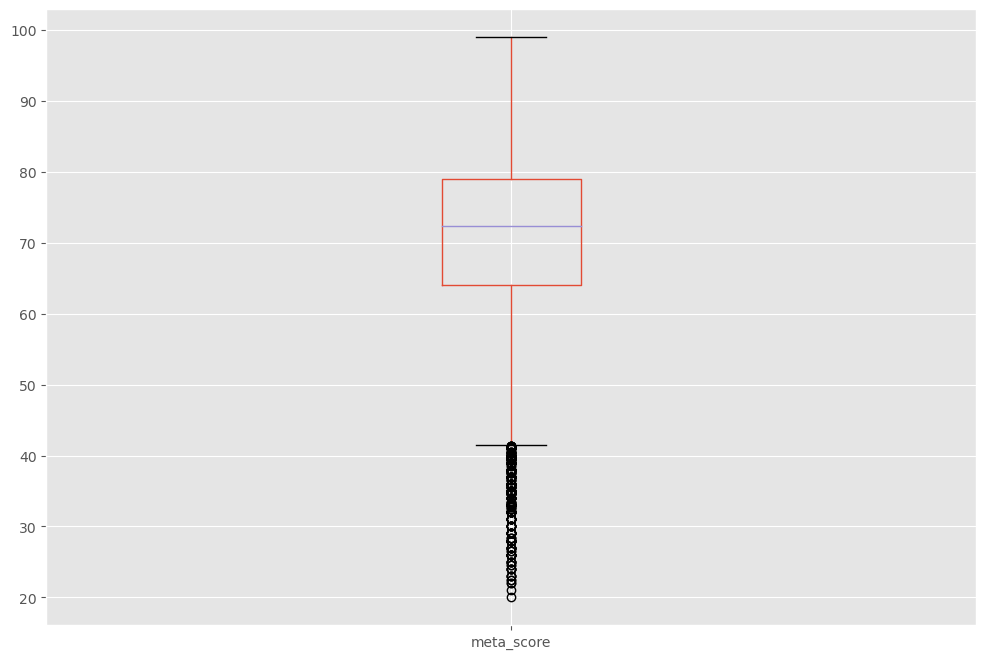

In [38]:
df.boxplot(column=['meta_score'])

<Axes: >

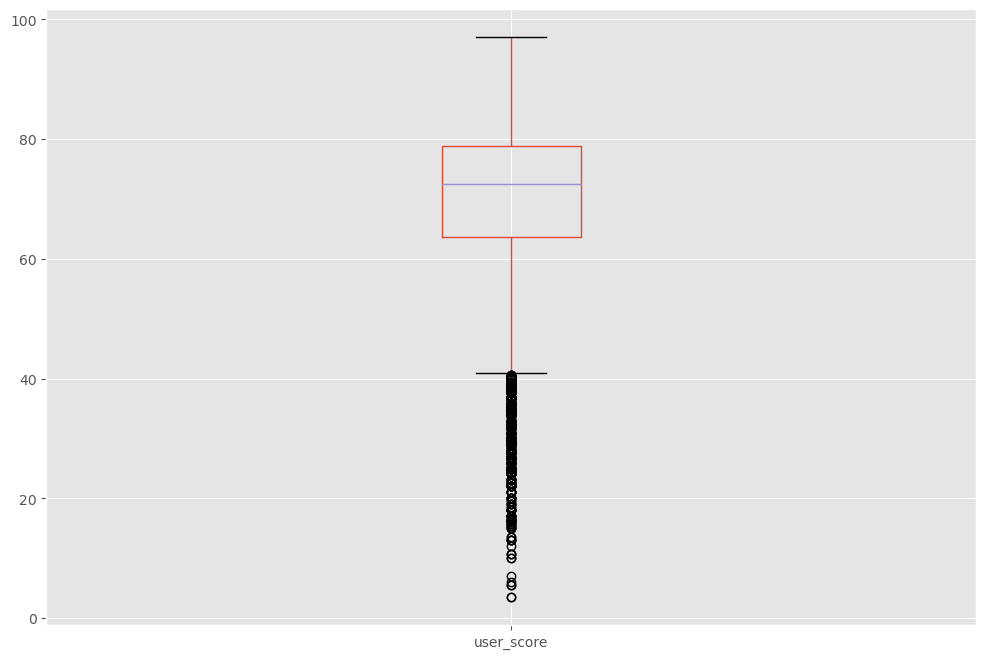

In [39]:
df.boxplot(column=['user_score'])